## Mushroom Classification
The goal of this activity is to create a model that predicts whether the mushroom is edible or poisonous.

* 1.1Exploration of Data

In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [2]:
df = pd.read_csv('mushrooms.csv');

In [3]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#To check if the data is imbalance

df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


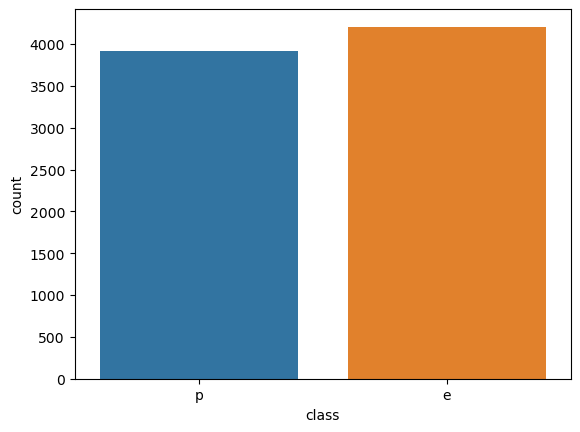

In [5]:
sns.countplot(df['class']);

### 2. Data Pre-Processing
* 2.1 Data Cleaning 
* 2.1.1 Drop Duplicates

In [6]:
#check the shape of the dataframe 
df.shape

(8124, 23)

In [7]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [8]:
#check again the shape of the dataframe 
df.duplicated().sum()

0

* 2.1.2 Fill-in Missing Values

In [9]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### As we can see, the dataset does not have any missing values in any of its features

In [10]:
#Columns - Features 
#target variable - attribute

* 2.1.3 Removing Extreme Values

In [11]:
#check types of features
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### Since we do not have any numerical features, we will skip "removing extreme values" step

* 2.2 Converting Categorical Features into numerical features

In [12]:
### We will use label encoding, label encoding will loop all columns to change it into 1,0 values

In [13]:
#import
from sklearn.preprocessing import LabelEncoder

In [14]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [15]:

encoder = LabelEncoder();

#para mapreserve yung lumang data
df_new = df.copy();


In [16]:
#loop

for col in df_new.columns:
    if(col != 'class'):
        df_new[col] = encoder.fit_transform(df_new[col]);

In [17]:
df_new.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,e,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,e,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,p,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,e,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
df_new['class'] = np.where(df_new['class'] == 'p', 1,0)

In [19]:
df_new.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [20]:
df_new.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

* 2.3 Data Normalization / Feature Scalling

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
df_scale = df_new.copy()
scaler = MinMaxScaler()

In [23]:
#loop

for col in df_scaled.columns:
    if(col != 'class'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1));
        #convert into 2 dimensional array - values.reshape(-1,1)

In [24]:
df_scaled.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
4,0,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667


* FEATURE SELECTION / Correlation Analysis

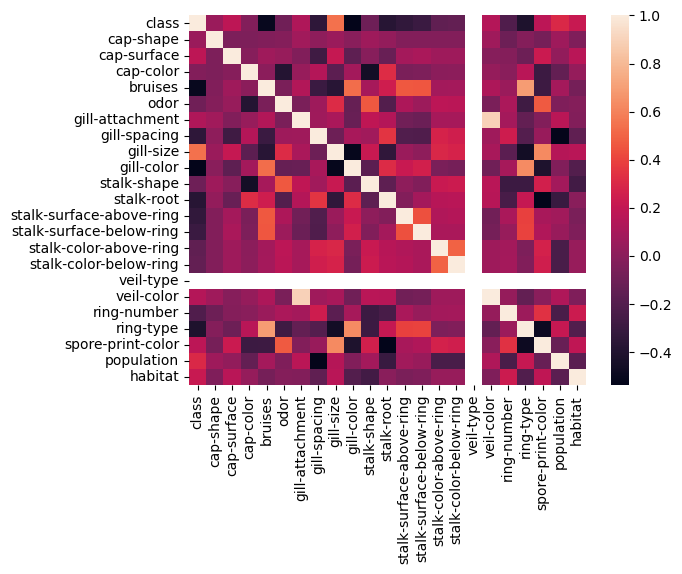

In [25]:
sns.heatmap(df_scaled.corr());

In [26]:
df_scaled = df_scaled.drop(['veil-type'], axis=1)

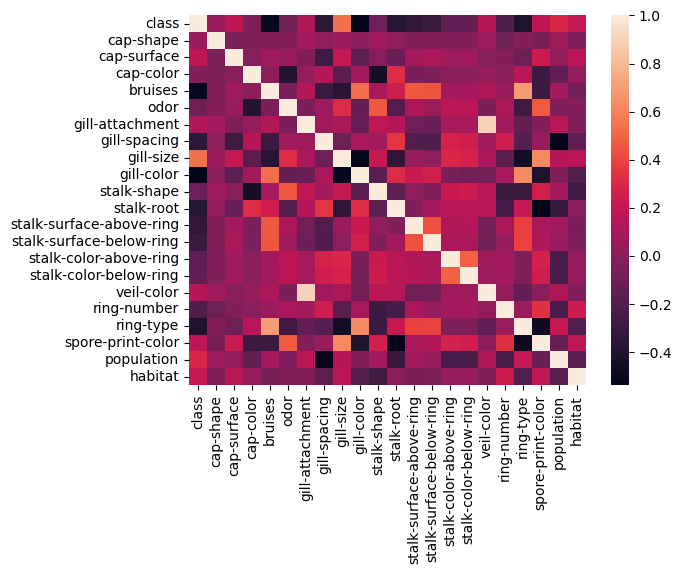

In [27]:
sns.heatmap(df_scaled.corr());

In [28]:
corr = df_scaled.corr()
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[corr_unstacked>.75]).sort_index()

C:\Users\win10\AppData\Local\Temp\ipykernel_11784\2485047892.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool)))


In [29]:
corr_df

,,0
gill-attachment,veil-color,0.897518


In [30]:
#drop gill-attachments to remove any correlation
df_scaled = df_scaled.drop(['gill-attachment'], axis=1)

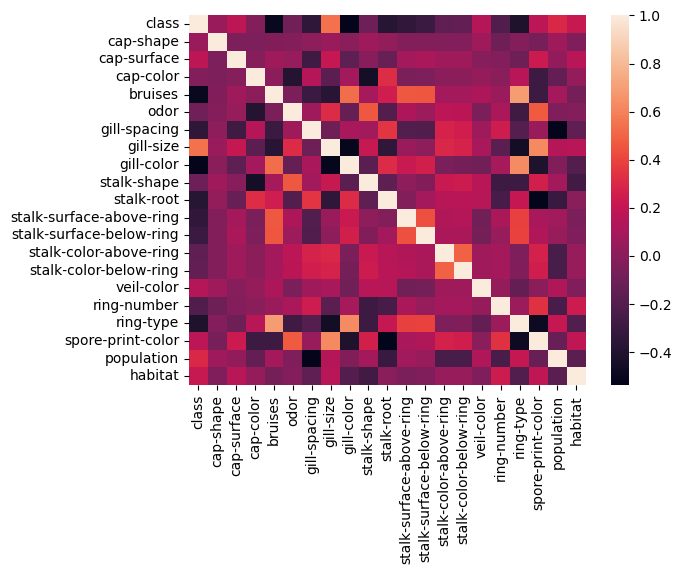

In [31]:
sns.heatmap(df_scaled.corr());

### 3. DATA MODELLING
* 3.1 Split Target variables to feature variables

In [32]:
#class is traget var
X = df_scaled.drop(['class'], axis=1);
y = df_scaled['class'];

* 3.2 Split the dataset to training and tests
* if supervised learning

In [33]:
#importing model selection for training and test
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=.80, stratify=y);
#stratify - para same ang feature.

In [35]:
#see values of train and test
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(8124, 20)
(6499, 20)
(1625, 20)


* 3.3 Choose The Best Model 

* 3.3.1 Naive Bayes

In [36]:
#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

In [37]:
#for evaluation

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report # so that we will not compute the accuracy

In [38]:
def evaluate_model(model):
    print('Classification Report\n',classification_report(y_test, model.predict(X_test), target_names=['edible','poisonous']));
    print('Confusion Matrix \n',confusion_matrix(y_test, model.predict(X_test), labels=[0,1]));
    print('\nTraining Accuracy Score: ', model.score(X_train, y_train))
    print('Test Accuracy Score: ', model.score(X_test, y_test))
    print('\n ROC Curve')
    plot_roc_curve(model,X_test,y_test);

In [39]:
gnb = GaussianNB()
gnb.fit(X_train, y_train);
gnb.score(X_test, y_test)

0.9353846153846154

Classification Report
               precision    recall  f1-score   support

      edible       0.91      0.97      0.94       842
   poisonous       0.96      0.90      0.93       783

    accuracy                           0.94      1625
   macro avg       0.94      0.93      0.94      1625
weighted avg       0.94      0.94      0.94      1625

Confusion Matrix 
 [[814  28]
 [ 77 706]]

Training Accuracy Score:  0.9302969687644252
Test Accuracy Score:  0.9353846153846154

 ROC Curve


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


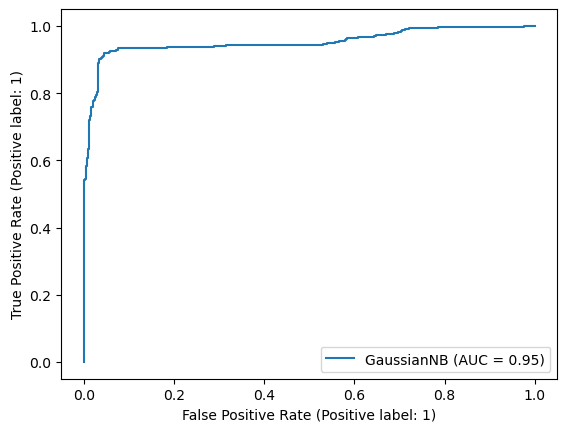

In [40]:
evaluate_model(gnb)
#classification - titignan lagi ang f1 score para sa accuracy rate
#not smooth

* 3.3.2 Bernoulli Naive Bayes

In [41]:
from sklearn.naive_bayes import BernoulliNB

In [42]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train);
bnb.score(X_test, y_test)

0.8467692307692307

Classification Report
               precision    recall  f1-score   support

      edible       0.80      0.93      0.86       842
   poisonous       0.91      0.75      0.83       783

    accuracy                           0.85      1625
   macro avg       0.86      0.84      0.84      1625
weighted avg       0.86      0.85      0.85      1625

Confusion Matrix 
 [[786  56]
 [193 590]]

Training Accuracy Score:  0.8364363748268965
Test Accuracy Score:  0.8467692307692307

 ROC Curve


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


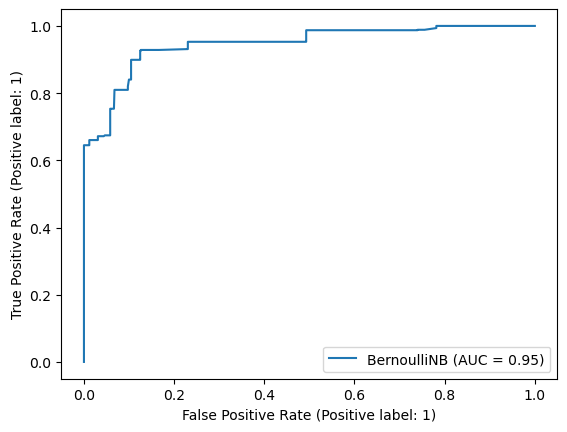

In [43]:
evaluate_model(bnb)
#not smooth

* 3.3.3 Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train);
dt.score(X_test, y_test)

1.0

Classification Report
               precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix 
 [[842   0]
 [  0 783]]

Training Accuracy Score:  1.0
Test Accuracy Score:  1.0

 ROC Curve


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


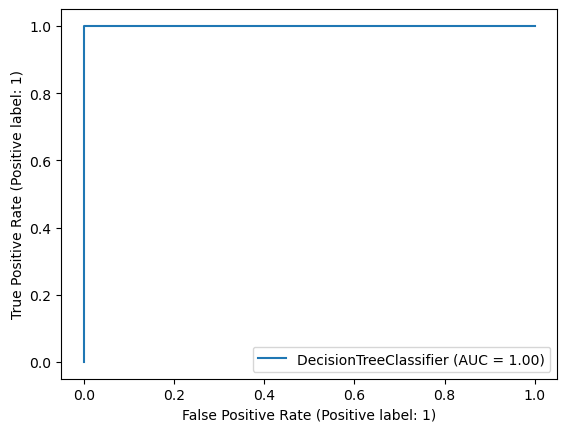

In [46]:
evaluate_model(dt)
#panget kasi hindi magiging accurate ang prediction

* 3.3.4 Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train);
rf.score(X_test, y_test)

1.0

Classification Report
               precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix 
 [[842   0]
 [  0 783]]

Training Accuracy Score:  1.0
Test Accuracy Score:  1.0

 ROC Curve


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


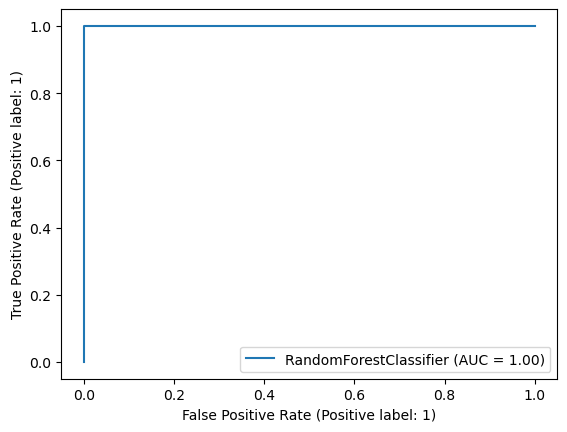

In [49]:
evaluate_model(rf)
#smooth but not recommended same with decision tree

* 3.3.5 KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train);
knn.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report
               precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix 
 [[842   0]
 [  0 783]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



Training Accuracy Score:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Test Accuracy Score:  1.0

 ROC Curve


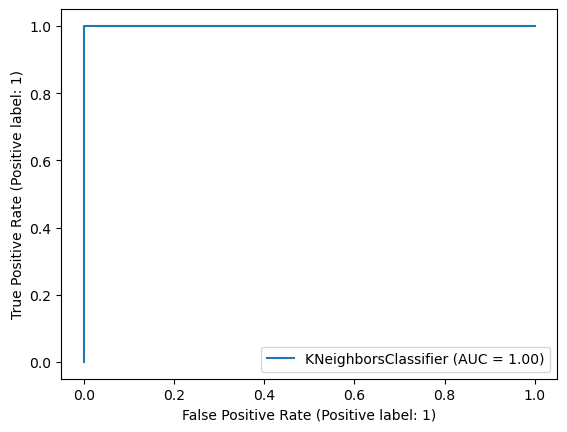

In [52]:
evaluate_model(knn)

* 3.3.5 Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train);
lr.score(X_test, y_test)

0.9532307692307692

Classification Report
               precision    recall  f1-score   support

      edible       0.95      0.96      0.96       842
   poisonous       0.96      0.94      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Confusion Matrix 
 [[812  30]
 [ 46 737]]

Training Accuracy Score:  0.9450684720726266
Test Accuracy Score:  0.9532307692307692

 ROC Curve


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


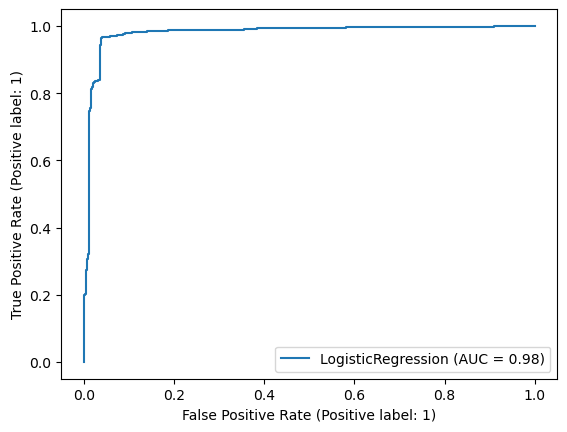

In [55]:
evaluate_model(lr)
#not so smooth

### 4. Hyperparameter Tuning / Cross Validation
To tune our model into a better model

* 4.1.1 Decision Tree Classifier Hyperparameter Tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [5,10,15,20]
}

rsearch = RandomizedSearchCV(DecisionTreeClassifier(), params, n_iter = 15, cv = 10)
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'splitter': ['best', 'random']})

In [58]:
rsearch.best_params_

{'splitter': 'best', 'max_depth': 10, 'criterion': 'entropy'}

In [59]:
dt_tuned = DecisionTreeClassifier(
        splitter ='best',
        max_depth = 10, 
        criterion = 'gini'
)

In [60]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

Classification Report
               precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix 
 [[842   0]
 [  0 783]]

Training Accuracy Score:  1.0
Test Accuracy Score:  1.0

 ROC Curve


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


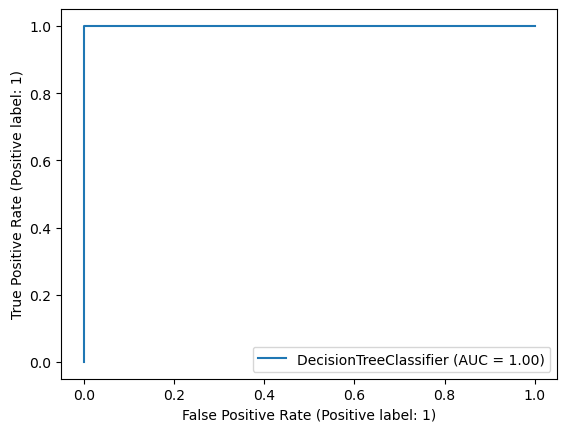

In [61]:
evaluate_model(dt_tuned)

* 4.4.2 RANDOM FOREST CLASSIFIER HYPERPARAMETER TUNING

In [62]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [5,10,15,20,30,50,100],
    'max_depth': [5,10,15,20]
}

rsearch_rf = RandomizedSearchCV(RandomForestClassifier(), params, n_iter = 15, cv = 10)
rsearch_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [5, 10, 15, 20, 30, 50,
                                                         100]})

In [64]:
rsearch_rf.best_params_

{'n_estimators': 30, 'max_depth': 20, 'criterion': 'entropy'}

In [65]:
rf_tuned = RandomForestClassifier(
        n_estimators = ,
        max_depth = 10, 
        criterion = 'gini'
)

SyntaxError: invalid syntax (2683752950.py, line 2)

In [ ]:
rf_tuned.fit(X_train, y_train)

In [ ]:
evaluate_model(rf_tuned)

In [ ]:
#cross validation 
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(dt_tuned, X_train, y_train, cv=20);
scores.mean()

### 5. Choosing a model / conclusion


* Since the cross validation score of models who gaines 100% accuracy in both training and test dataset is still 100%, we can conclude that the best models for tjis data is either DecisionTree, RandomForest or KNN Classifier Algorithm

In [ ]:
# Golden Rule
#pag clean ang data good ang model
#pinaka magandang model ang pipiliin, mataas